In [41]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
from google.colab import files
uploaded = files.upload()

Saving Copy of Online retail.csv to Copy of Online retail (3).csv


In [44]:
df = pd.read_csv("Copy of Online retail.csv")  # adjust filename if needed
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [46]:
df.shape

(7500, 1)

In [47]:
print(df.columns.tolist())

['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil']


In [48]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
display(frequent_itemsets)

print("\nAssociation Rules:")
display(rules)

Frequent Itemsets:


,support,itemsets
0,0.087200,(burgers)
1,0.020933,(meatballs)
2,0.179733,(eggs)
3,0.062533,(turkey)
4,0.033200,(avocado)
...,...,...
254,0.011467,"(spaghetti, pancakes, mineral water)"
255,0.017067,"(spaghetti, ground beef, mineral water)"
256,0.010267,"(spaghetti, olive oil, mineral water)"
257,0.010933,"(ground beef, chocolate, mineral water)"



Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
1,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,1.0,0.013127,1.086974,0.555682,0.120941,0.080015,0.245256
2,(burgers),(turkey),0.087200,0.062533,0.010667,0.122324,1.956143,1.0,0.005214,1.068124,0.535484,0.076702,0.063779,0.146450
3,(turkey),(burgers),0.062533,0.087200,0.010667,0.170576,1.956143,1.0,0.005214,1.100522,0.521395,0.076702,0.091341,0.146450
4,(burgers),(mineral water),0.087200,0.238267,0.024400,0.279817,1.174384,1.0,0.003623,1.057693,0.162675,0.081045,0.054546,0.191111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,"(spaghetti, chocolate)",(milk),0.039200,0.129600,0.010933,0.278912,2.152095,1.0,0.005853,1.207064,0.557178,0.069257,0.171544,0.181637
404,"(chocolate, milk)",(spaghetti),0.032133,0.174133,0.010933,0.340249,1.953957,1.0,0.005338,1.251785,0.504427,0.055973,0.201141,0.201518
405,(spaghetti),"(chocolate, milk)",0.174133,0.032133,0.010933,0.062787,1.953957,1.0,0.005338,1.032707,0.591158,0.055973,0.031672,0.201518
406,(milk),"(spaghetti, chocolate)",0.129600,0.039200,0.010933,0.084362,2.152095,1.0,0.005853,1.049323,0.615047,0.069257,0.047005,0.181637


Now I will apply the Apriori algorithm to find frequent itemsets and then generate association rules based on these itemsets.

In [49]:
# Split the single column into a list of items per row
transactions = df.iloc[:,0].str.split(',', expand=True)

# Stack the items and remove leading/trailing whitespace
transactions_stacked = transactions.stack().str.strip()

# Get unique items
unique_items = transactions_stacked.unique()

# Create a one-hot encoded DataFrame
one_hot_df = pd.DataFrame(0, index=transactions.index, columns=unique_items)

# Populate the one-hot encoded DataFrame
for index, row in transactions.iterrows():
    for item in row.dropna():
        one_hot_df.at[index, item.strip()] = 1

display(one_hot_df.head())

,burgers,meatballs,eggs,chutney,turkey,avocado,mineral water,milk,energy bar,whole wheat rice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,cream,napkins,whole weat flour
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The previous cell failed because the `one_hot_df` DataFrame was not defined. I'll regenerate the code to create it.

Now I will apply the Apriori algorithm to find frequent itemsets and then generate association rules based on these itemsets.

In [50]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
display(frequent_itemsets)

print("\nAssociation Rules:")
display(rules)

Frequent Itemsets:


,support,itemsets
0,0.087200,(burgers)
1,0.020933,(meatballs)
2,0.179733,(eggs)
3,0.062533,(turkey)
4,0.033200,(avocado)
...,...,...
254,0.011467,"(spaghetti, pancakes, mineral water)"
255,0.017067,"(spaghetti, ground beef, mineral water)"
256,0.010267,"(spaghetti, olive oil, mineral water)"
257,0.010933,"(ground beef, chocolate, mineral water)"



Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
1,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,1.0,0.013127,1.086974,0.555682,0.120941,0.080015,0.245256
2,(burgers),(turkey),0.087200,0.062533,0.010667,0.122324,1.956143,1.0,0.005214,1.068124,0.535484,0.076702,0.063779,0.146450
3,(turkey),(burgers),0.062533,0.087200,0.010667,0.170576,1.956143,1.0,0.005214,1.100522,0.521395,0.076702,0.091341,0.146450
4,(burgers),(mineral water),0.087200,0.238267,0.024400,0.279817,1.174384,1.0,0.003623,1.057693,0.162675,0.081045,0.054546,0.191111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,"(spaghetti, chocolate)",(milk),0.039200,0.129600,0.010933,0.278912,2.152095,1.0,0.005853,1.207064,0.557178,0.069257,0.171544,0.181637
404,"(chocolate, milk)",(spaghetti),0.032133,0.174133,0.010933,0.340249,1.953957,1.0,0.005338,1.251785,0.504427,0.055973,0.201141,0.201518
405,(spaghetti),"(chocolate, milk)",0.174133,0.032133,0.010933,0.062787,1.953957,1.0,0.005338,1.032707,0.591158,0.055973,0.031672,0.201518
406,(milk),"(spaghetti, chocolate)",0.129600,0.039200,0.010933,0.084362,2.152095,1.0,0.005853,1.049323,0.615047,0.069257,0.047005,0.181637


In [51]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules = rules.sort_values(by='lift', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
247,(ground beef),(herb & pepper),0.016000,0.162822,3.291555
246,(herb & pepper),(ground beef),0.016000,0.323450,3.291555
327,"(spaghetti, mineral water)",(ground beef),0.017067,0.285714,2.907540
330,(ground beef),"(spaghetti, mineral water)",0.017067,0.173677,2.907540
336,(olive oil),"(spaghetti, mineral water)",0.010267,0.156187,2.614731
333,"(spaghetti, mineral water)",(olive oil),0.010267,0.171875,2.614731
164,(frozen vegetables),(tomatoes),0.016133,0.169231,2.474134
165,(tomatoes),(frozen vegetables),0.016133,0.235867,2.474134
160,(frozen vegetables),(shrimp),0.016667,0.174825,2.450820
161,(shrimp),(frozen vegetables),0.016667,0.233645,2.450820


Top 5 rules with highest lift:
                    antecedents                 consequents   support  \
247               (ground beef)             (herb & pepper)  0.016000   
246             (herb & pepper)               (ground beef)  0.016000   
327  (spaghetti, mineral water)               (ground beef)  0.017067   
330               (ground beef)  (spaghetti, mineral water)  0.017067   
336                 (olive oil)  (spaghetti, mineral water)  0.010267   

     confidence      lift  
247    0.162822  3.291555  
246    0.323450  3.291555  
327    0.285714  2.907540  
330    0.173677  2.907540  
336    0.156187  2.614731  


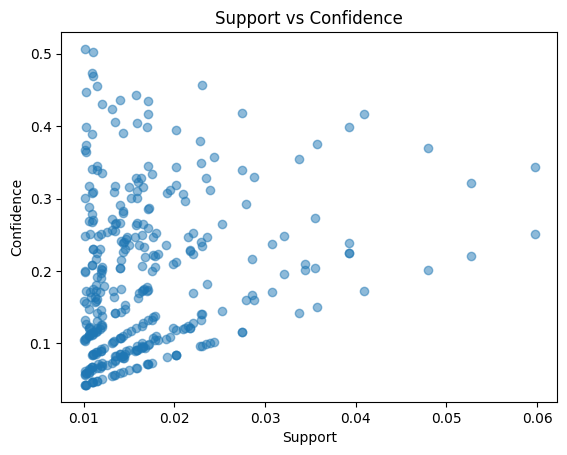

In [52]:
# Example insights
print("Top 5 rules with highest lift:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Optional: plot support vs confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


***Interview Questions***

Q1. What is lift and why is it important in Association rules?

Lift measures how much more likely the consequent occurs given the antecedent than it would by chance.

Formula:

Lift
(
𝐴
→
𝐵
)
=
Confidence
(
𝐴
→
𝐵
)
Support
(
𝐵
)
Lift(A→B)=
Support(B)
Confidence(A→B)
	​


Importance: Lift > 1 indicates a positive association; lift = 1 means independence; lift < 1 indicates negative association.

Q2. What is support and confidence? How do you calculate them?

Support: How frequently the itemset appears in the dataset.

Support
(
𝐴
)
=
Transactions containing
𝐴
Total transactions
Support(A)=
Total transactions
Transactions containing A
	​


Confidence: Likelihood that consequent occurs when antecedent occurs.

Confidence
(
𝐴
→
𝐵
)
=
Support
(
𝐴
∪
𝐵
)
Support
(
𝐴
)
Confidence(A→B)=
Support(A)
Support(A∪B)
	​


Q3. Limitations / Challenges of Association Rules Mining

Large number of rules → hard to interpret.

Rare items may be ignored if support is too high.

Sensitive to threshold selection (support, confidence, lift).

Doesn’t consider time or sequence of purchases.

High dimensionality may increase computation time.